In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('orange_juice_withmissing.csv')

In [4]:
print("Dimensions:", df.shape)
print("\nSummary:\n", df.describe(include='all'))
print("\nMissing Values:\n", df.isnull().sum())

Dimensions: (1070, 18)

Summary:
        Purchase  WeekofPurchase      StoreID      PriceCH      PriceMM  \
count      1070     1070.000000  1069.000000  1069.000000  1066.000000   
unique        2             NaN          NaN          NaN          NaN   
top          CH             NaN          NaN          NaN          NaN   
freq        653             NaN          NaN          NaN          NaN   
mean        NaN      254.381308     3.956969     1.867428     2.085038   
std         NaN       15.558286     2.308189     0.102017     0.134429   
min         NaN      227.000000     1.000000     1.690000     1.690000   
25%         NaN      240.000000     2.000000     1.790000     1.990000   
50%         NaN      257.000000     3.000000     1.860000     2.090000   
75%         NaN      268.000000     7.000000     1.990000     2.180000   
max         NaN      278.000000     7.000000     2.090000     2.290000   

             DiscCH       DiscMM    SpecialCH    SpecialMM      LoyalCH  \
co

In [5]:
df['PriceCH'].fillna(df['PriceCH'].mean(), inplace=True)
df['PriceMM'].fillna(df['PriceMM'].mean(), inplace=True)
df['StoreID'].fillna(df['StoreID'].mode()[0], inplace=True)
df['DiscCH'].fillna(df['DiscCH'].mean(), inplace=True)

<ipython-input-5-a73b24eae1d0>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PriceCH'].fillna(df['PriceCH'].mean(), inplace=True)
<ipython-input-5-a73b24eae1d0>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [6]:
df['DiscMM'].fillna(df['DiscMM'].mean(), inplace=True)
df['LoyalCH'].fillna(df['LoyalCH'].mean(), inplace=True)
df['SalePriceMM'].fillna(df['SalePriceMM'].mean(), inplace=True)
df['SalePriceCH'].fillna(df['SalePriceCH'].mean(), inplace=True)

<ipython-input-6-4dc0918917ac>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['DiscMM'].fillna(df['DiscMM'].mean(), inplace=True)
<ipython-input-6-4dc0918917ac>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [7]:
df['PctDiscMM'].fillna(df['PctDiscMM'].mean(), inplace=True)
df['PctDiscCH'].fillna(df['PctDiscCH'].mean(), inplace=True)
df['SpecialCH'].fillna(df['SpecialCH'].mode()[0], inplace=True)
df['SpecialMM'].fillna(df['SpecialMM'].mode()[0], inplace=True)
df['STORE'].fillna(df['STORE'].mode()[0], inplace=True)

<ipython-input-7-7cca4ffea69b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PctDiscMM'].fillna(df['PctDiscMM'].mean(), inplace=True)
<ipython-input-7-7cca4ffea69b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

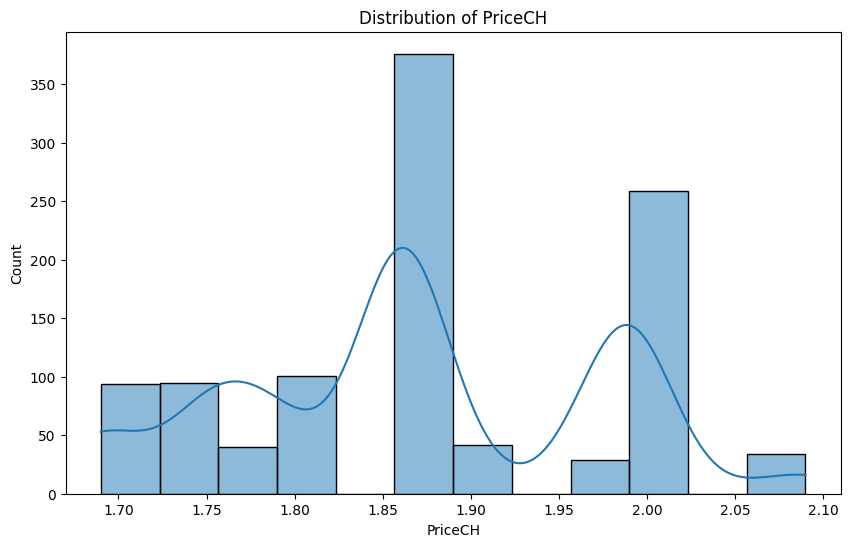

In [8]:
# 3. Univariate Analysis - Distribution of individual variables
plt.figure(figsize=(10,6))
sns.histplot(df['PriceCH'], kde=True)
plt.title('Distribution of PriceCH')
plt.show()

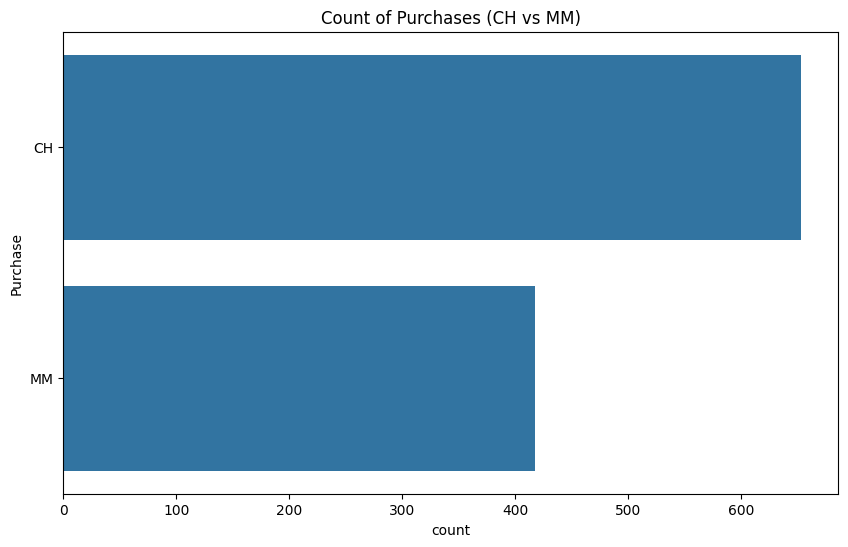

In [9]:
plt.figure(figsize=(10,6))
sns.countplot(df['Purchase'])
plt.title('Count of Purchases (CH vs MM)')
plt.show()

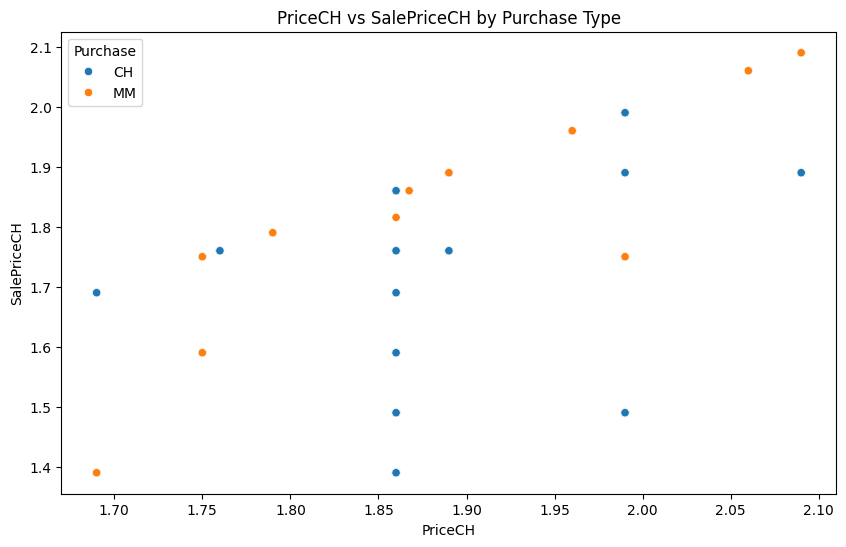

In [10]:
# 4. Bivariate Analysis
plt.figure(figsize=(10,6))
sns.scatterplot(x='PriceCH', y='SalePriceCH', hue='Purchase', data=df)
plt.title('PriceCH vs SalePriceCH by Purchase Type')
plt.show()

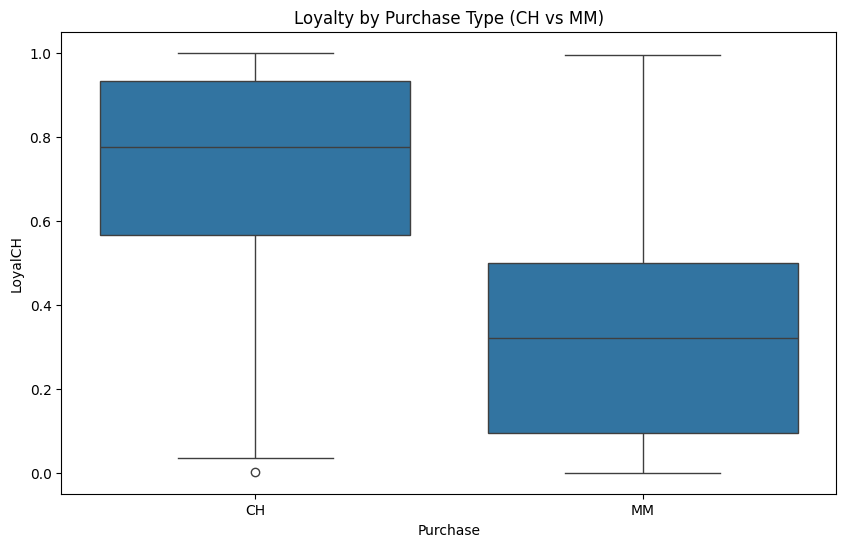

In [11]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Purchase', y='LoyalCH', data=df)
plt.title('Loyalty by Purchase Type (CH vs MM)')
plt.show()

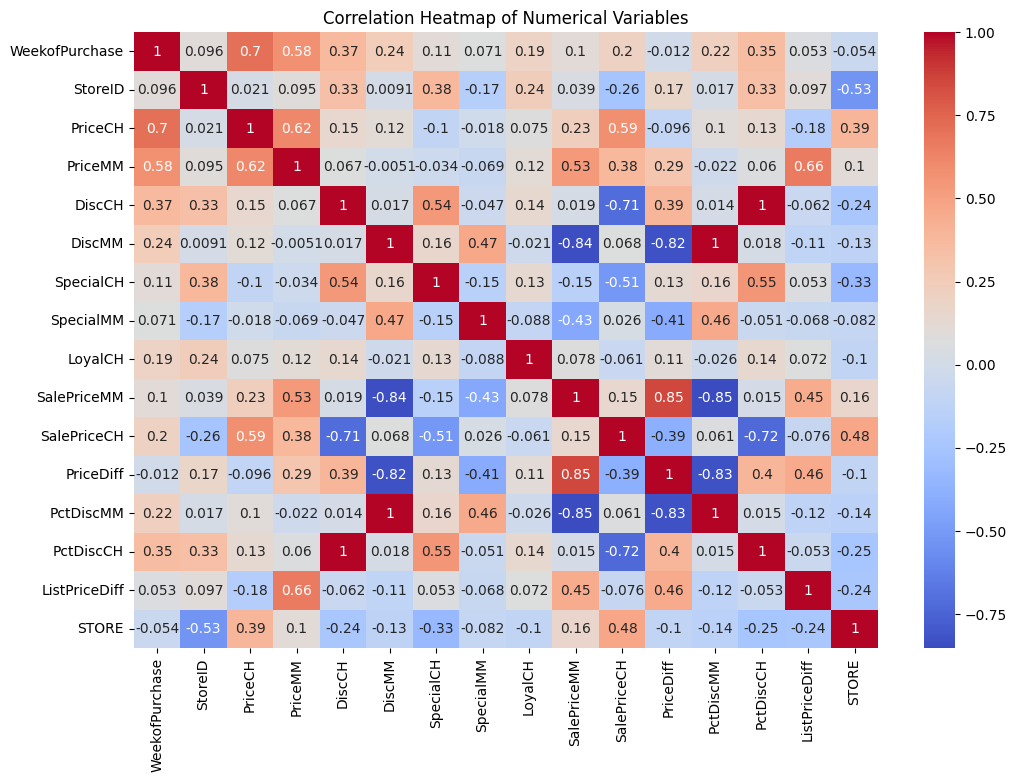

In [12]:
# 5. Multivariate Analysis - Correlation Matrix
plt.figure(figsize=(12,8))
# Include numeric_only=True to only include numerical columns in the correlation
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

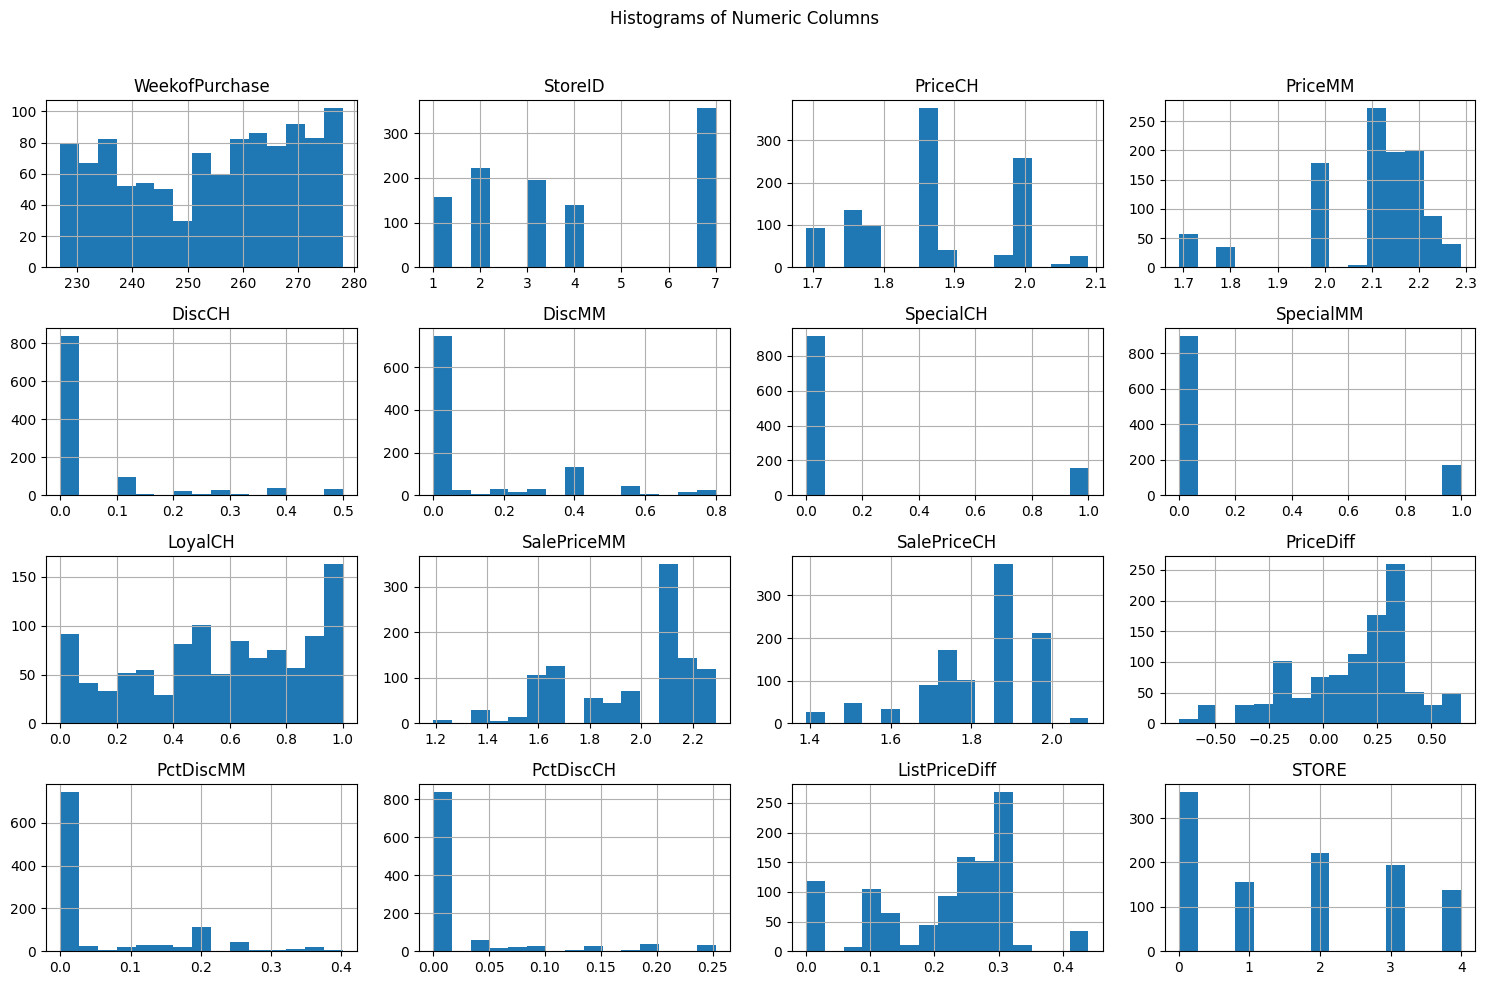

In [13]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols].hist(bins=15, figsize=(15, 10), layout=(4, 4))
plt.suptitle('Histograms of Numeric Columns')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


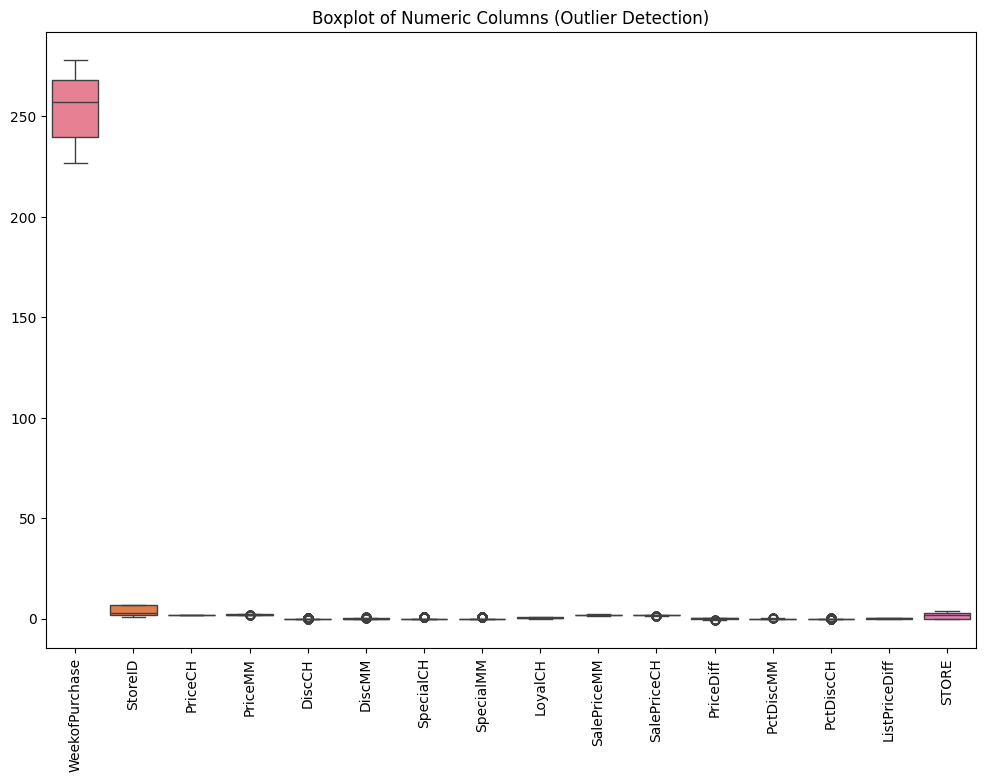

In [ ]:
#Boxplots for outlier detection
plt.figure(figsize=(12,8))
sns.boxplot(data=df[numeric_cols])
plt.title('Boxplot of Numeric Columns (Outlier Detection)')
plt.xticks(rotation=90)
plt.show()

In [ ]:
corr_matrix = df[['PriceCH', 'PriceMM', 'SalePriceCH', 'SalePriceMM', 'LoyalCH']].corr()

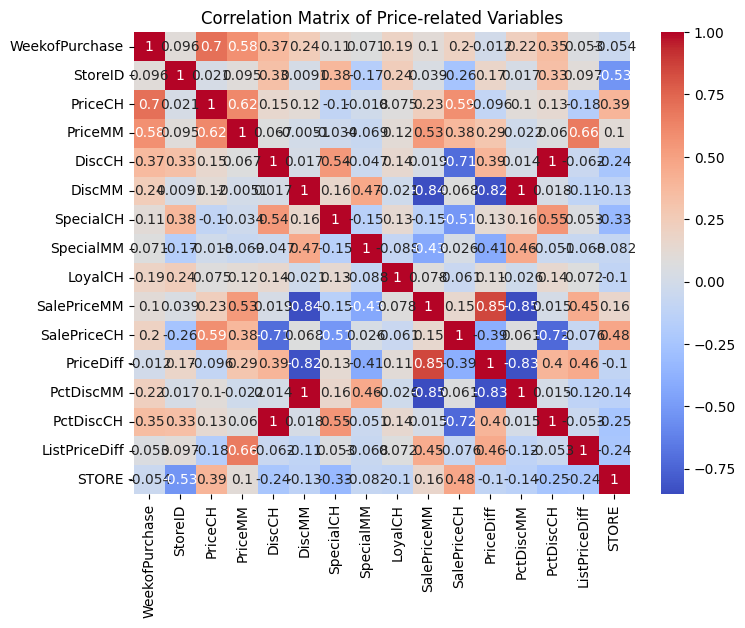

In [14]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Price-related Variables')
plt.show()

In [16]:
print("\nSkewness of Numerical Columns:\n", df[numeric_cols].skew())
print("\nKurtosis of Numerical Columns:\n", df[numeric_cols].kurt())


Skewness of Numerical Columns:
 WeekofPurchase   -0.210990
StoreID           0.311245
PriceCH           0.064212
PriceMM          -1.464291
DiscCH            2.415341
DiscMM            1.596689
SpecialCH         1.999614
SpecialMM         1.840470
LoyalCH          -0.278453
SalePriceMM      -0.802511
SalePriceCH      -0.951936
PriceDiff        -0.758308
PctDiscMM         1.542194
PctDiscCH         2.423251
ListPriceDiff    -0.645208
STORE             0.256591
dtype: float64

Kurtosis of Numerical Columns:
 WeekofPurchase   -1.274927
StoreID          -1.489230
PriceCH          -0.775128
PriceMM           2.194334
DiscCH            4.931348
DiscMM            1.499494
SpecialCH         2.002193
SpecialMM         1.389925
LoyalCH          -1.054620
SalePriceMM      -0.498980
SalePriceCH       0.959385
PriceDiff         0.463377
PctDiscMM         1.289656
PctDiscCH         4.881851
ListPriceDiff    -0.228993
STORE            -1.294005
dtype: float64


In [18]:
 #1-D Statistical Data Analysis (Univariate)
for col in numeric_cols:
    print(f"\nSummary statistics for {col}:\n")
    print("Mean:", df[col].mean())
    print("Median:", df[col].median())
    print("Mode:", df[col].mode()[0])


Summary statistics for WeekofPurchase:

Mean: 254.38130841121495
Median: 257.0
Mode: 274

Summary statistics for StoreID:

Mean: 3.9598130841121497
Median: 3.0
Mode: 7.0

Summary statistics for PriceCH:

Mean: 1.8674275023386342
Median: 1.86
Mode: 1.86

Summary statistics for PriceMM:

Mean: 2.0850375234521574
Median: 2.09
Mode: 2.09

Summary statistics for DiscCH:

Mean: 0.05195692883895131
Median: 0.0
Mode: 0.0

Summary statistics for DiscMM:

Mean: 0.12341463414634148
Median: 0.0
Mode: 0.0

Summary statistics for SpecialCH:

Mean: 0.14672897196261683
Median: 0.0
Mode: 0.0

Summary statistics for SpecialMM:

Mean: 0.1616822429906542
Median: 0.0
Mode: 0.0

Summary statistics for LoyalCH:

Mean: 0.5652030422535211
Median: 0.5975999999999999
Mode: 0.5

Summary statistics for SalePriceMM:

Mean: 1.9619342723004696
Median: 2.09
Mode: 2.09

Summary statistics for SalePriceCH:

Mean: 1.8155191768007484
Median: 1.86
Mode: 1.86

Summary statistics for PriceDiff:

Mean: 0.14632366697848456
Me

In [19]:
# 2-D Statistical Data Analysis (Bivariate) - Correlation of key pairs
print("\nSelected Correlations:")
print("Correlation between PriceCH and SalePriceCH:", df['PriceCH'].corr(df['SalePriceCH']))
print("Correlation between PriceMM and SalePriceMM:", df['PriceMM'].corr(df['SalePriceMM']))


Selected Correlations:
Correlation between PriceCH and SalePriceCH: 0.5867859500192817
Correlation between PriceMM and SalePriceMM: 0.5321693491088745


In [20]:
# Contingency Tables for Categorical Variables
contingency_table = pd.crosstab(df['SpecialCH'], df['SpecialMM'])
print("\nContingency Table between SpecialCH and SpecialMM:\n", contingency_table)


Contingency Table between SpecialCH and SpecialMM:
 SpecialMM  0.0  1.0
SpecialCH          
0.0        744  169
1.0        153    4


In [21]:
# n-D Statistical Data Analysis (Correlation among multiple variables)
print("\nCorrelation Matrix:\n", df[numeric_cols].corr())


Correlation Matrix:
                 WeekofPurchase   StoreID   PriceCH   PriceMM    DiscCH  \
WeekofPurchase        1.000000  0.096046  0.704386  0.576201  0.365583   
StoreID               0.096046  1.000000  0.020728  0.095207  0.333078   
PriceCH               0.704386  0.020728  1.000000  0.615002  0.152081   
PriceMM               0.576201  0.095207  0.615002  1.000000  0.066984   
DiscCH                0.365583  0.333078  0.152081  0.066984  1.000000   
DiscMM                0.241603  0.009062  0.116695 -0.005074  0.017466   
SpecialCH             0.108215  0.380312 -0.102522 -0.034286  0.537103   
SpecialMM             0.070688 -0.171641 -0.017871 -0.069020 -0.047323   
LoyalCH               0.192707  0.237495  0.075436  0.116308  0.139125   
SalePriceMM           0.103959  0.038689  0.227384  0.532169  0.019390   
SalePriceCH           0.201142 -0.257938  0.586786  0.382723 -0.710878   
PriceDiff            -0.012062  0.174745 -0.096365  0.294992  0.394440   
PctDiscMM       

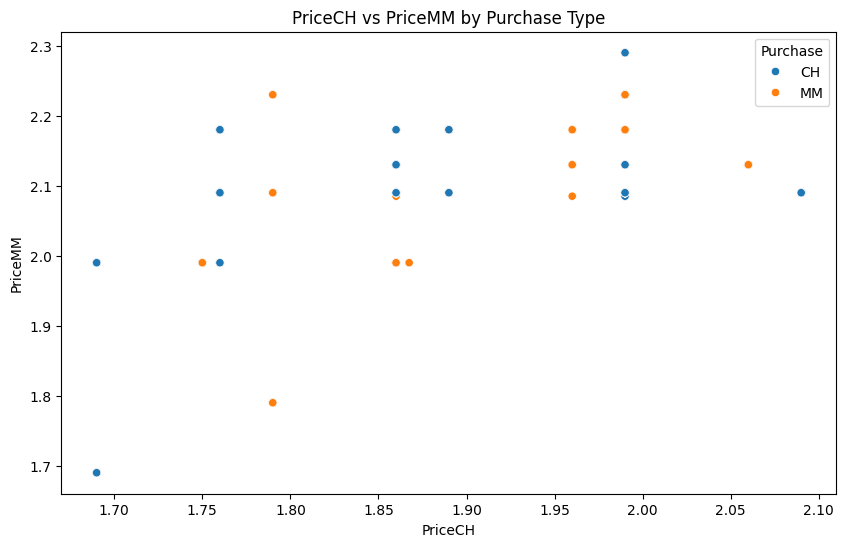

In [22]:
# Visualization - Scatter plots, Dot charts, and Bar plots
plt.figure(figsize=(10,6))
sns.scatterplot(x='PriceCH', y='PriceMM', hue='Purchase', data=df)
plt.title('PriceCH vs PriceMM by Purchase Type')
plt.show()

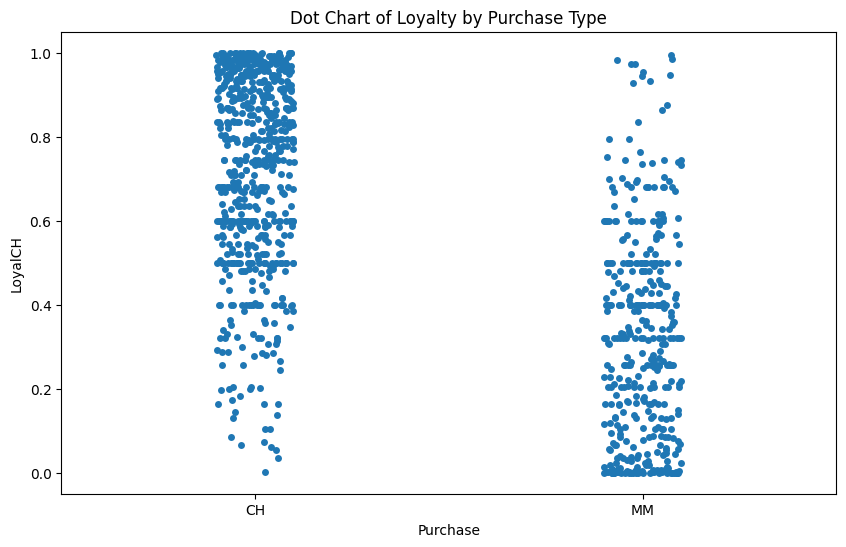

In [23]:
plt.figure(figsize=(10,6))
sns.stripplot(x='Purchase', y='LoyalCH', data=df, jitter=True)
plt.title('Dot Chart of Loyalty by Purchase Type')
plt.show()

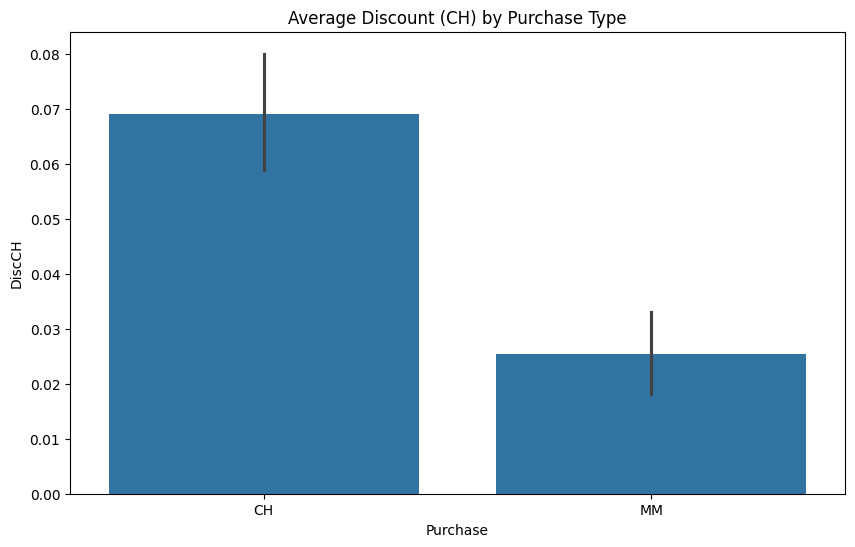

In [24]:
plt.figure(figsize=(10,6))
sns.barplot(x='Purchase', y='DiscCH', data=df)
plt.title('Average Discount (CH) by Purchase Type')
plt.show()

In [26]:
# Clustering - KMeans and Hierarchical Clustering
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

In [30]:
# KMeans Clustering
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

imputer = SimpleImputer(strategy='mean')
df_imputed = imputer.fit_transform(df[numeric_cols])

kmeans = KMeans(n_clusters=3, random_state=0)
df['KMeans_Cluster'] = kmeans.fit_predict(df_imputed)

In [33]:
# Hierarchical Clustering
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df_imputed = imputer.fit_transform(df[numeric_cols])

hierarchical = AgglomerativeClustering(n_clusters=3)
df['Hierarchical_Cluster'] = hierarchical.fit_predict(df_imputed)

In [36]:
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df_imputed_pca = imputer.fit_transform(df[numeric_cols])

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_imputed_pca)

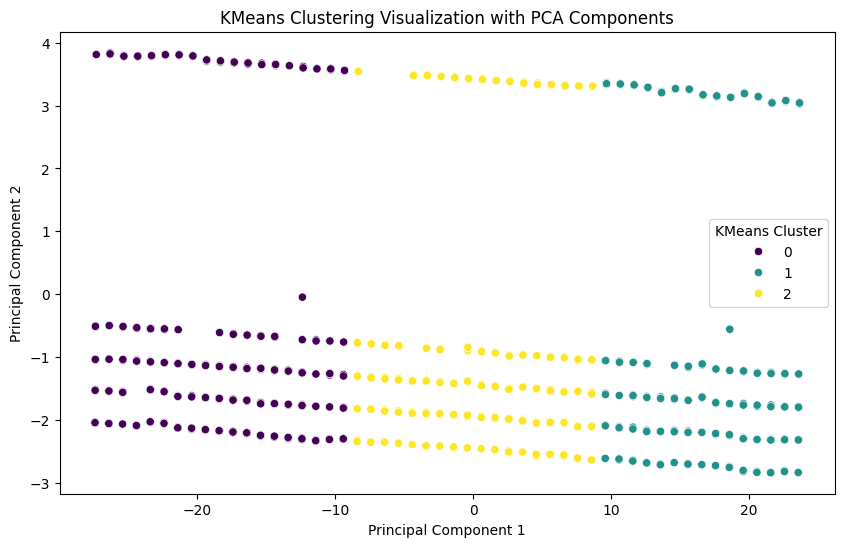

In [44]:
# Plot for KMeans Clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df['KMeans_Cluster'], palette='viridis')
plt.title('KMeans Clustering Visualization with PCA Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='KMeans Cluster')
plt.show()



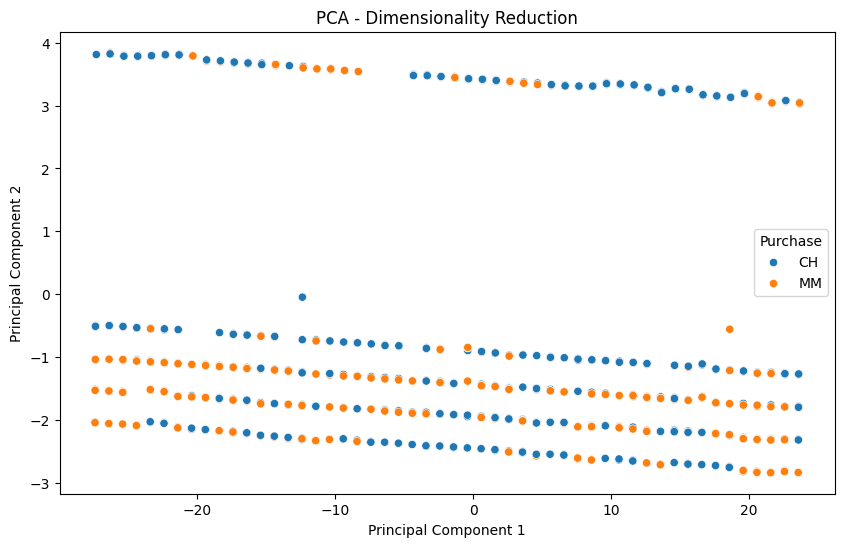

In [37]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df_pca[:,0], y=df_pca[:,1], hue=df['Purchase'])
plt.title('PCA - Dimensionality Reduction')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [38]:
# Linear Regression Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix

In [39]:
X = df[['PriceCH', 'LoyalCH']]
y = df['SalePriceCH']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [40]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)
y_pred = reg_model.predict(X_test)

print("\nLinear Regression Performance:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))



Linear Regression Performance:
Mean Squared Error: 0.012930157713648966
R-squared: 0.3728190104923187


In [42]:
# Confusion Matrix
y_test_class = np.where(y_test > y_test.mean(), 1, 0)
y_pred_class = np.where(y_pred > y_test.mean(), 1, 0)

In [43]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test_class, y_pred_class))


Confusion Matrix:
 [[133  14]
 [ 44 130]]
